In [1]:
import os
import numpy as np
import sys
sys.path.append('../../')
from utils.VisualisationUtils import *
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

In [2]:
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best.pt'
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-adam-flip-640-3e4-mosaic-b16-2\weights\best.pt'

model = YOLO(model_path)

In [ ]:
samples_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples'
img_files = os.listdir(samples_dir)
img_files = [os.path.join(samples_dir, img) for img in img_files]

preds = []
imgs = []
for img in img_files:
    im = cv2.imread(img)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    imgs.append(im)

    result_array = model(im)[0].plot();
    preds.append(result_array)

show_images(preds, shape=(6, 6), figsize=(35, 35))
# show_images(imgs, figsize=(25, 15))

In [1]:
import os
import random
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import wandb
from ultralytics import YOLO
from collections import defaultdict

# === CONFIG ===
val_images_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes'  # CHANGE THIS
val_ann_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\coco_bal_val.json'  # COCO format
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best.pt'
num_samples_per_class = 5

# === Load COCO Annotations ===
with open(val_ann_path, 'r') as f:
    coco = json.load(f)

# Map image_id → file_name
img_id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

# Map category_id → name
category_id_to_name = {cat["id"]: cat["name"] for cat in coco["categories"]}

# Group image_ids by category
category_to_images = defaultdict(set)
for ann in coco["annotations"]:
    category_to_images[ann["category_id"]].add(ann["image_id"])

# Pick N images per class
selected_images = set()
for cat_id, image_ids in category_to_images.items():
    selected = random.sample(list(image_ids), min(num_samples_per_class, len(image_ids)))
    selected_images.update(selected)

# === Load Model ===
model = YOLO(model_path)



image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\midv500_data\images\28_hun_passport\images\HA\HA28_23.jpg: 640x384 1 id_card, 9566.0ms
Speed: 5.3ms preprocess, 9566.0ms inference, 238.2ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\Screen\images_balanced\20190928_034355_000_jpg.rf.42187c8c139751320bccb6fd32015d72_dup2.jpg: 640x640 1 screen, 20371.5ms
Speed: 8.8ms preprocess, 20371.5ms inference, 14.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\CCPD2019\images\00873204022988-90_98-295&509_466&574-444&571_286&576_311&513_469&508-0_0_8_32_32_31_11-77-27.jpg: 640x416 1 license_plate, 7083.7ms
Speed: 6.4ms preprocess, 7083.7ms inference, 12.7ms postprocess per image at shape (1, 3, 640, 416)

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\dat

<Figure size 2500x1500 with 0 Axes>

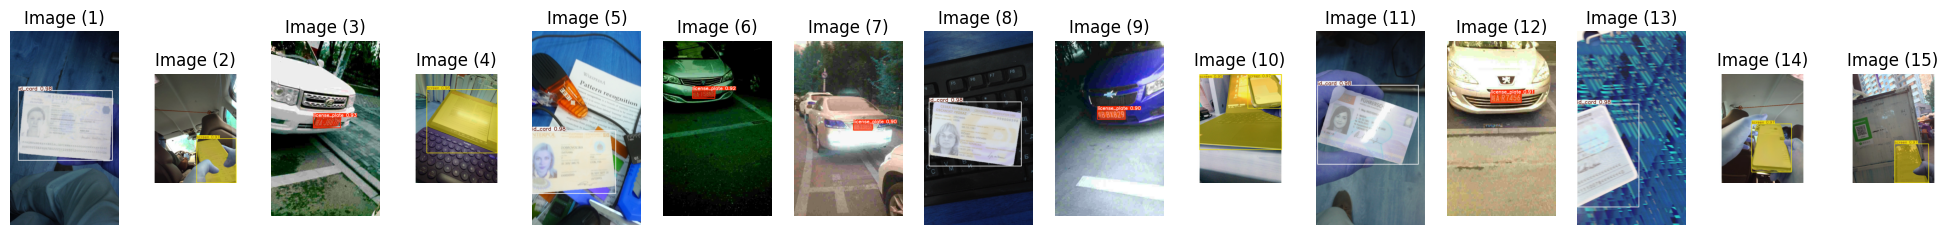

In [3]:
import matplotlib.pyplot as plt
import cv2
import random

# Define the number of samples per class
samples_per_class = 5

# Get class names from the model
class_names = model.names

# Initialize a dictionary to store sampled images for each class
sampled_images = {class_id: [] for class_id in class_names.keys()}
results = []
# Iterate over validation dataset
for img_id in selected_images:
    img_path = os.path.join(val_images_dir, img_id_to_file[img_id])
    
    result = model(img_path)
    result_array = result[0].plot()

    results.append(result_array)

show_images(results, figsize=(25, 15))

In [10]:
results = model.predict(img_path, conf=0.25)


image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\midv500_data\images\49_usa_ssn82\images\HS\HS49_17.tif: 640x384 1 id_card, 68.7ms
Speed: 2.7ms preprocess, 68.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)


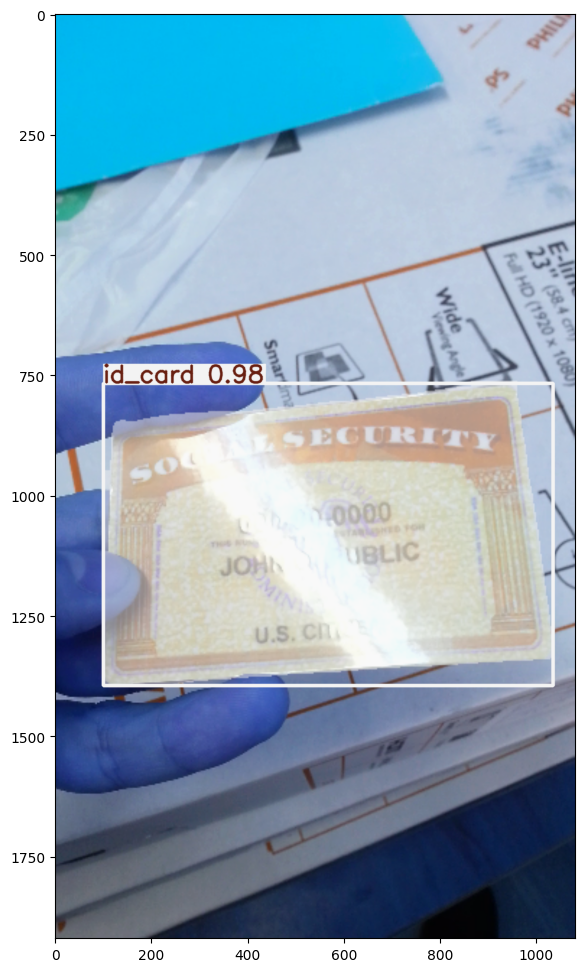

In [11]:
new_result_array = results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)